In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Connecting to google drive

In [ ]:
from google.colab import drive

drive.mount('drive')

Mounted at drive


In [ ]:
dataset_address = 'drive/MyDrive/laptop_dataset.csv'
original_frame = pd.read_csv(dataset_address)
df = pd.read_csv(dataset_address)
df

,price,cpu,ram,ssd,graphic_ram,screen_size,stock_status,hdd,company,links
0,80000000,Core i7,16000.0,512,6000,15.6,new,1000,lenovo,https://torob.com/p/79be1572-e929-4d5d-a0de-25...
1,16000000,Core i3,0.0,0,0,14.0,stock,0,lenovo,https://torob.com/p/181d0dda-a35b-4a1e-a70c-72...
2,82900000,Core i5,0.0,0,0,16.1,new,0,apple,https://torob.com/p/2d69bc8e-40c3-4143-9c5e-83...
3,7200000,Core i3,0.0,0,0,13.0,new,0,apple,https://torob.com/p/844ab554-1825-4a4c-bf76-f4...
4,34800000,Ryzen 5,16000.0,1000,4000,16.0,new,0,hp,https://torob.com/p/e4b9b537-7b7a-4b6a-a30f-38...
...,...,...,...,...,...,...,...,...,...,...
1555,23970000,Ryzen 7,12000.0,512,6000,15.6,new,1000,lenovo,https://torob.com/p/4a9a6f03-6747-4d10-ab7f-ca...
1556,9000000,Celeron,4000.0,128,0,15.6,new,1000,lenovo,https://torob.com/p/8bd8c3f7-ab30-40ca-84f6-b4...
1557,47797000,Ryzen 7,16000.0,512,4000,15.6,new,0,asus,https://torob.com/p/1d17d658-16e3-47d7-a4ac-b9...
1558,5900000,Core i3,0.0,0,0,15.0,new,0,lenovo,https://torob.com/p/e67aed83-4354-4c41-9e07-d5...


##Visualizing data

<ipython-input-4-a18180e26955>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: title={'center': 'laptop Price Distribution Plot'}, xlabel='price', ylabel='Density'>

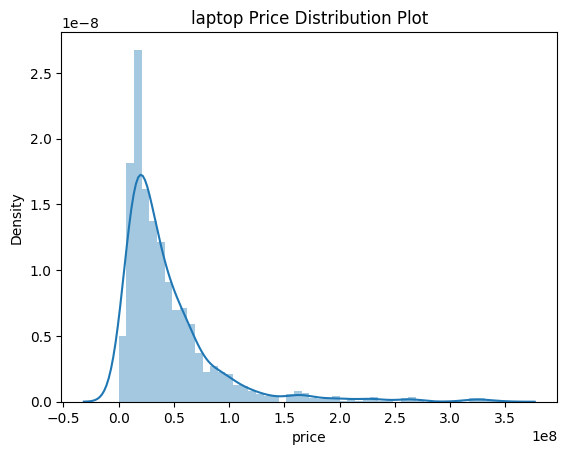

In [ ]:
import seaborn as sns
plt.title('laptop Price Distribution Plot')
sns.distplot(df['price'])

The price plot is right-skewed.

##Visualizing numerical data

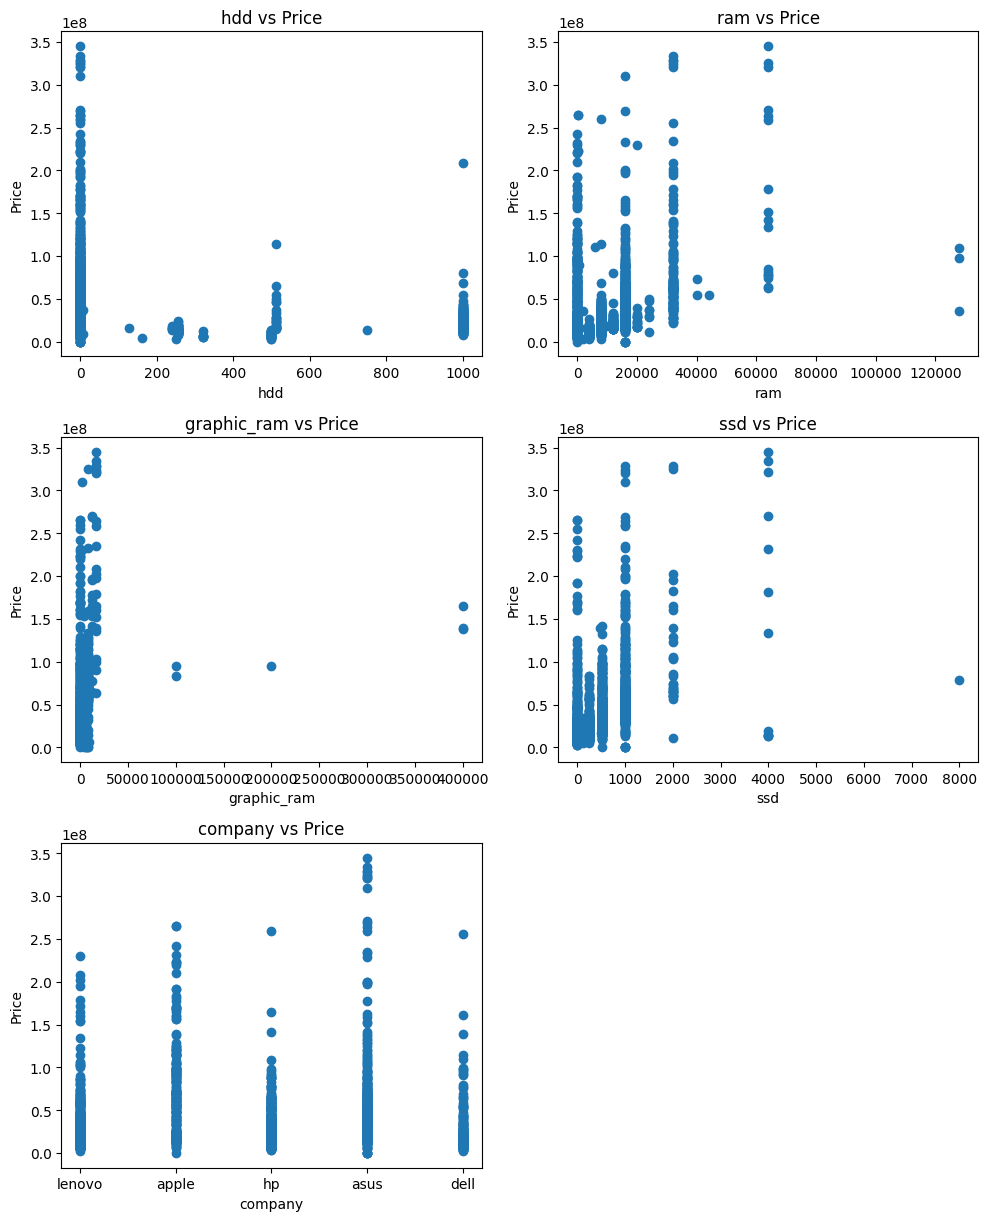

In [ ]:

def my_plotter(feature,num):
    plt.subplot(5,2,num)
    plt.scatter(df[feature],df['price'])
    plt.title(feature+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(feature)

my_plotter('hdd', 1)
my_plotter('ram', 2)
my_plotter('graphic_ram', 3)
my_plotter('ssd', 4)
plt.tight_layout()

Asus laptops seem to be more expensive tahn others

##Visualizing catogorical data

[Text(0.5, 0, 'company'), Text(0, 0.5, 'Frequency of stock_status')]

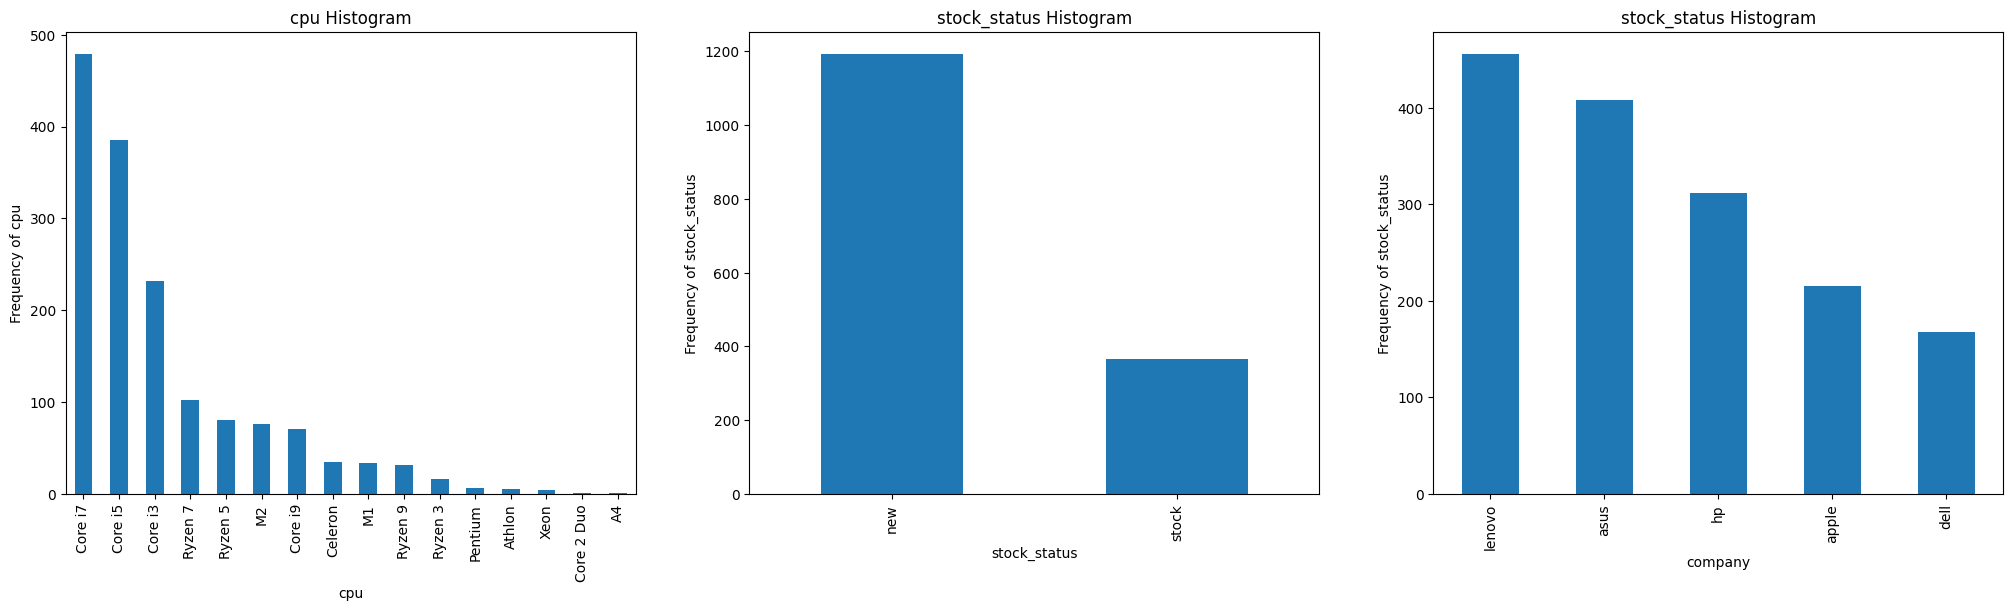

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cpu'].value_counts().plot(kind='bar')
plt.title('cpu Histogram')
plt1.set(xlabel = 'cpu', ylabel='Frequency of cpu')

plt.subplot(1,3,2)
plt1 = df['stock_status'].value_counts().plot(kind='bar')
plt.title('stock_status Histogram')
plt1.set(xlabel = 'stock_status', ylabel='Frequency of stock_status')

plt.subplot(1,3,3)
plt1 = df['company'].value_counts().plot(kind='bar')
plt.title('stock_status Histogram')
plt1.set(xlabel = 'company', ylabel='Frequency of stock_status')


intel cpus are more popular than others among users.

most of the dataset is filled with new laptops.

lenovo is the most popular between users.

##Correlation Matrix

<ipython-input-7-a4fd5c33a98a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


<Axes: >

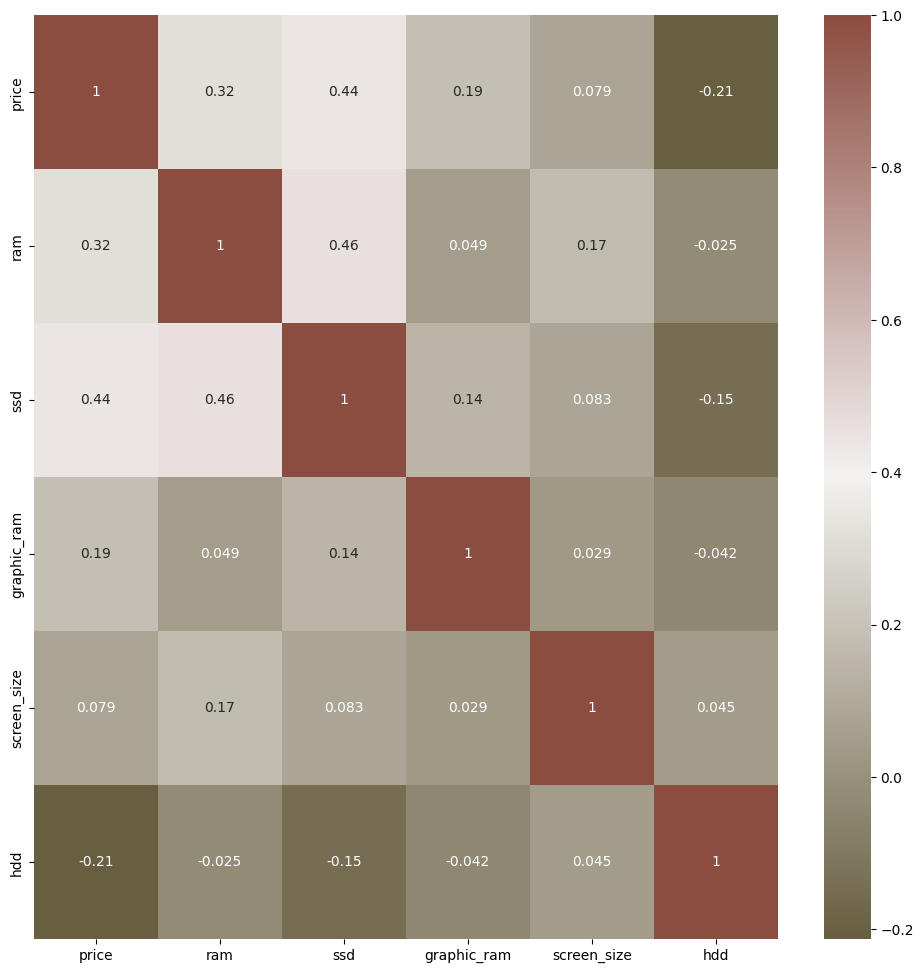

In [ ]:

cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat=df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

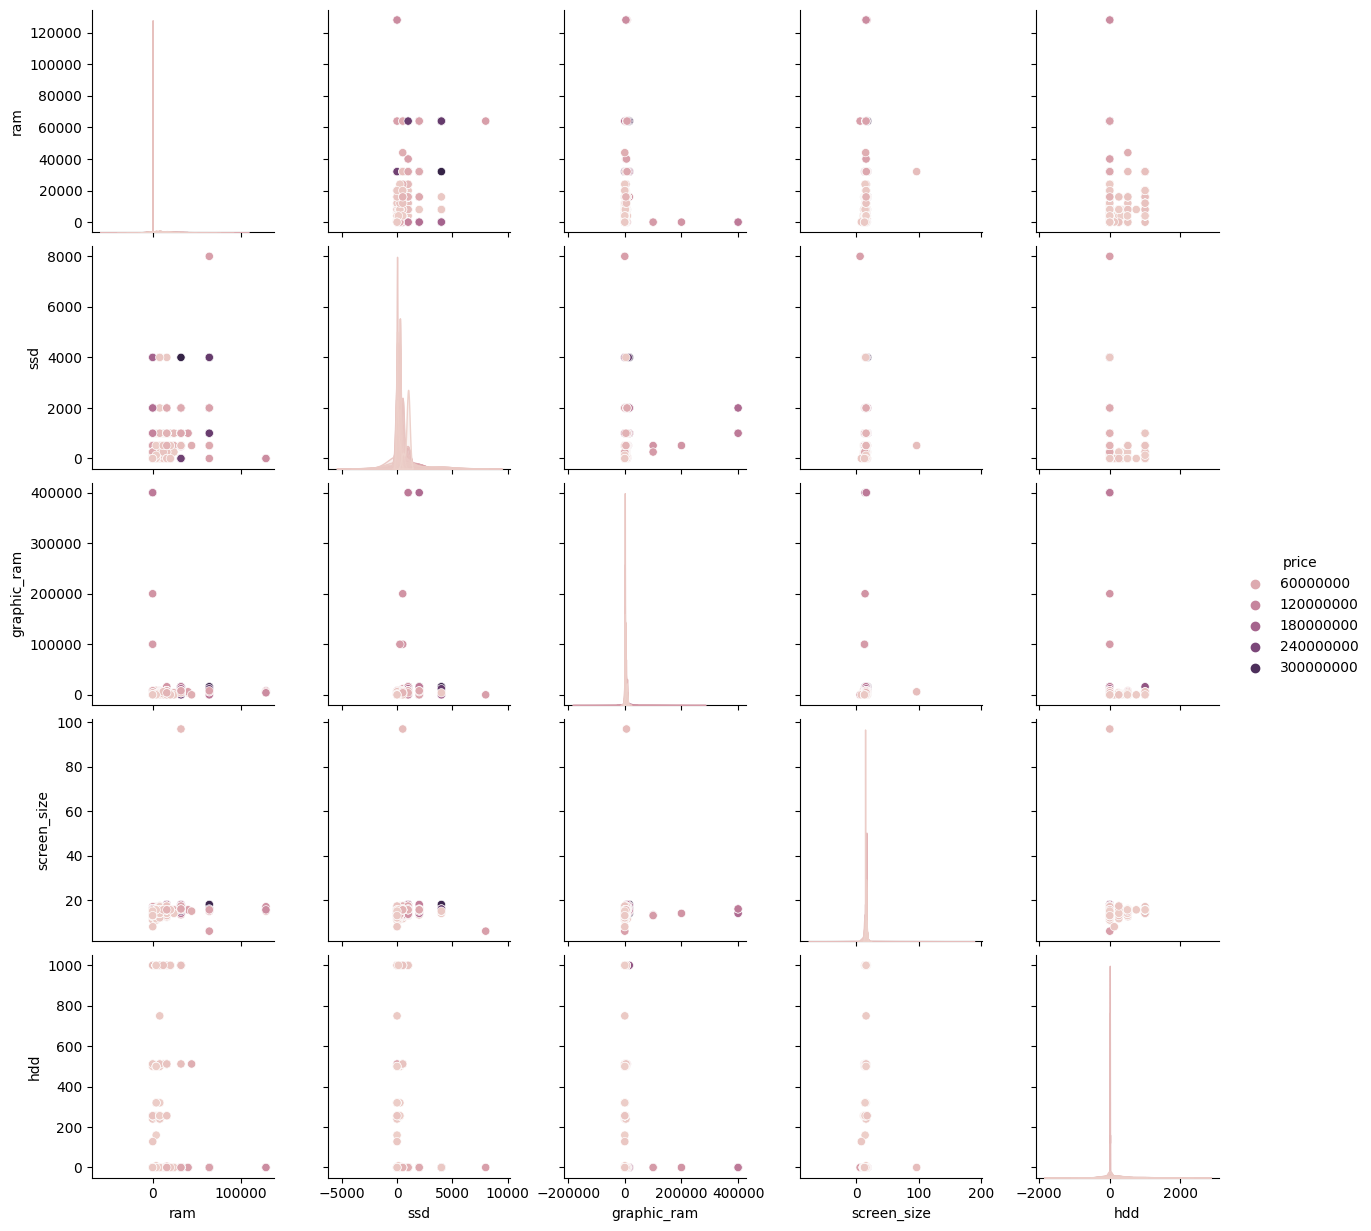

In [ ]:
sns.pairplot(df,hue='price')

#feature engineering

In [ ]:
#droping "links" column
df = df.drop('links',axis = 1)

one hot encoding for categorical datas

In [ ]:
one_hot = pd.get_dummies(df['cpu'])
df = df.drop('cpu',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['stock_status'])
df = df.drop('stock_status',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['company'])
df = df.drop('company',axis = 1)
df = df.join(one_hot)


In [ ]:
minvalue_series = df.min()

minvalue_series

price          100000.0
ram                 0.0
ssd                 0.0
graphic_ram         0.0
screen_size         6.0
hdd                 0.0
A4                  0.0
Athlon              0.0
Celeron             0.0
Core 2 Duo          0.0
Core i3             0.0
Core i5             0.0
Core i7             0.0
Core i9             0.0
M1                  0.0
M2                  0.0
Pentium             0.0
Ryzen 3             0.0
Ryzen 5             0.0
Ryzen 7             0.0
Ryzen 9             0.0
Xeon                0.0
new                 0.0
stock               0.0
apple               0.0
asus                0.0
dell                0.0
hp                  0.0
lenovo              0.0
dtype: float64

new price = price/100000

In [ ]:
df.loc[:,'price'] /= 100000
df

,price,ram,ssd,graphic_ram,screen_size,hdd,A4,Athlon,Celeron,Core 2 Duo,...,Ryzen 7,Ryzen 9,Xeon,new,stock,apple,asus,dell,hp,lenovo
0,800.00,16000.0,512,6000,15.6,1000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,160.00,0.0,0,0,14.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,829.00,0.0,0,0,16.1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,72.00,0.0,0,0,13.0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,348.00,16000.0,1000,4000,16.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,239.70,12000.0,512,6000,15.6,1000,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1556,90.00,4000.0,128,0,15.6,1000,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1557,477.97,16000.0,512,4000,15.6,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1558,59.00,0.0,0,0,15.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


###splitting the dataset to test, train and validation sets

In [ ]:
y=df['price'].to_numpy()
target = y
X=df.drop('price', axis=1)
features = X
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

##Building the model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
y_train = regressor.predict(X_train)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

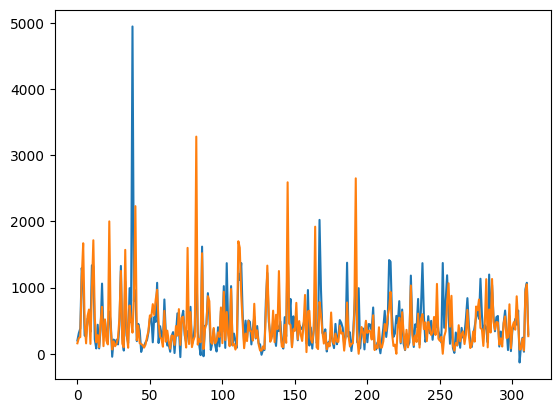

In [ ]:
plt.plot(y_pred) #blue
plt.plot(y_test) #orange
plt.show()

In [ ]:
# create a KFold object with 5 splits
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.999, 1.   , 1.   , 0.999, 1.   ])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

def rmse_cv(model, k):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=k)).mean()
    return rmse




In [ ]:
from sklearn.model_selection import learning_curve, cross_val_score
def draw_learning_curve(model, k):
  '''
  The train_sizes parameter in the learning_curve function
  specifies the number of training examples to use for each fold of the cross-validation
  '''
  train_sizes = np.linspace(0.1, 1.0, 10)

  # Create a k-fold cross-validator
  crossـvalidator = KFold(n_splits=k, shuffle=True, random_state=42)

  # Define MSE as the custom scoring metric
  scoring_metric = 'neg_mean_squared_error'

  # Calculate the learning curve using scikit-learn's learning_curve function
  train_sizes, train_scores, valid_scores = learning_curve(model, X, y,
                                                           scoring=scoring_metric,
                                                           cv=crossـvalidator,
                                                           train_sizes=train_sizes)

  # Convert the scores to positive values (since the scoring metric is negative)
  train_scores = -train_scores
  valid_scores = -valid_scores

  # Calculate the mean and standard deviation of the training and validation scores across all folds
  train_scores_mean = np.mean(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)

  # Plot the learning curve
  plt.figure(figsize=(4, 4))
  plt.title("k = "+str(k))
  plt.xlabel("Training Examples")
  plt.ylabel("MSE")
  plt.grid()
  '''
  train_scores_mean - train_scores_std: The lower bounds of the shaded region around the mean training scores at each training set size.
  This is calculated by subtracting the standard deviation of the training scores across all folds from the mean training scores.
  '''
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  '''
  train_scores_mean + train_scores_std: The upper bounds of the shaded region around the mean training scores at each training set size.
  This is calculated by adding the standard deviation of the training scores across all folds to the mean training scores.
  '''
  plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="b")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training")
  plt.plot(train_sizes, valid_scores_mean, 'o-', color="b", label="Cross-validation")
  plt.legend(loc="best")
  plt.show()

##Linear Regression

MAE: 195.47940256719028
MSE: 165707.66249722263
RMSE: 407.07206057063485
R2 Score: 0.11683115431090874
 - - - - - - - - - - - - K =  2  - - - - - - - - - - - -
RMSE Cross-Validation with k= 2 : 339.50656442283434


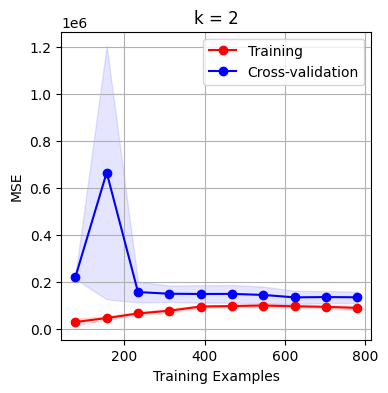

 - - - - - - - - - - - - K =  3  - - - - - - - - - - - -
RMSE Cross-Validation with k= 3 : 337.9618932141157


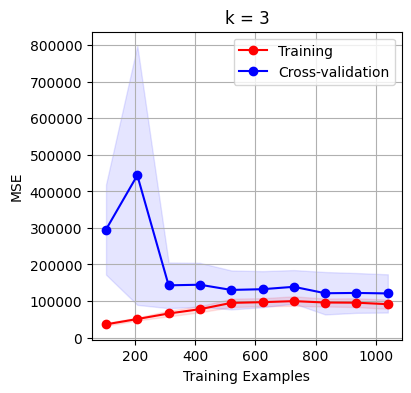

 - - - - - - - - - - - - K =  4  - - - - - - - - - - - -
RMSE Cross-Validation with k= 4 : 335.93050188583726


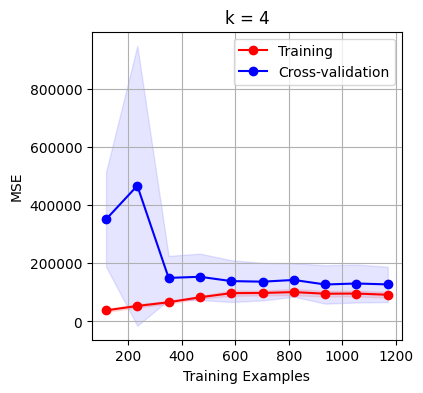

 - - - - - - - - - - - - K =  5  - - - - - - - - - - - -
RMSE Cross-Validation with k= 5 : 335.2859078234057


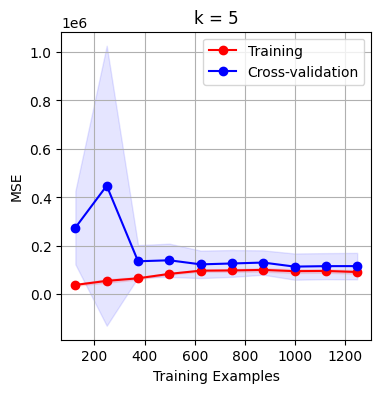

 - - - - - - - - - - - - K =  6  - - - - - - - - - - - -
RMSE Cross-Validation with k= 6 : 333.0390493807187


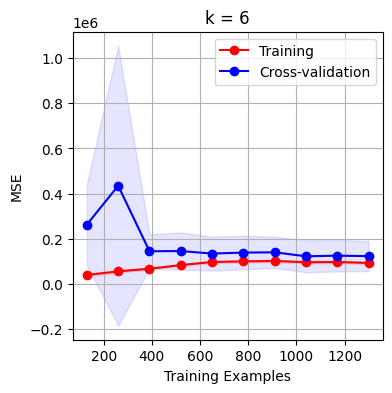

 - - - - - - - - - - - - K =  7  - - - - - - - - - - - -
RMSE Cross-Validation with k= 7 : 334.7289464140718


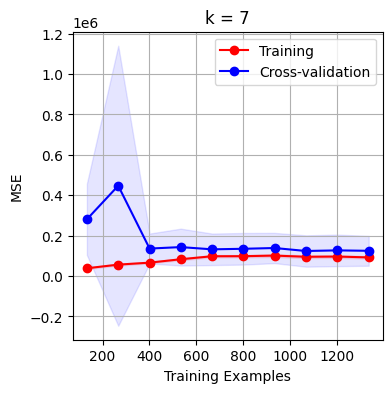

 - - - - - - - - - - - - K =  8  - - - - - - - - - - - -
RMSE Cross-Validation with k= 8 : 328.4126076255724


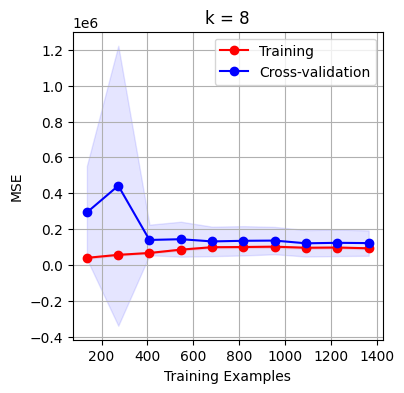

 - - - - - - - - - - - - K =  9  - - - - - - - - - - - -
RMSE Cross-Validation with k= 9 : 328.770011546323


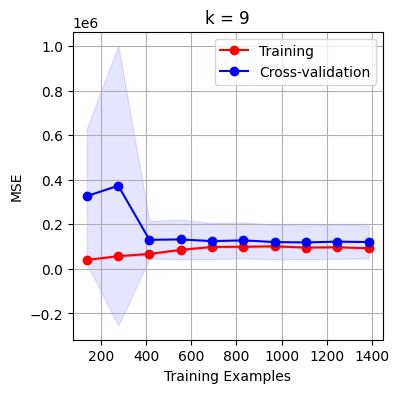

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


for k in range(2,10):
  rmse_cross_val = rmse_cv(lin_reg, k)
  print(" -"*12,"K = ",k," -"*12)
  print("RMSE Cross-Validation with k=",k,":", rmse_cross_val)
  draw_learning_curve(lin_reg, k)


MAE: 175.60293295609003
MSE: 93876.45333816018
RMSE: 306.3926456985549
R2 Score: 0.49966852659309957
 - - - - - - - - - - - - K =  2  - - - - - - - - - - - -
RMSE Cross-Validation with k= 2 : 250.16923822174078


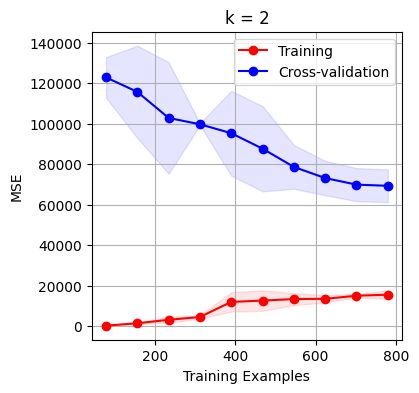

 - - - - - - - - - - - - K =  3  - - - - - - - - - - - -
RMSE Cross-Validation with k= 3 : 243.22319610693458


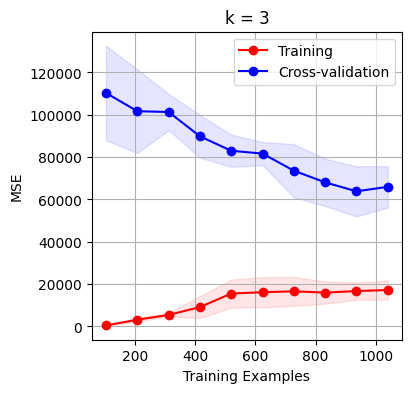

 - - - - - - - - - - - - K =  4  - - - - - - - - - - - -
RMSE Cross-Validation with k= 4 : 240.28589439455644


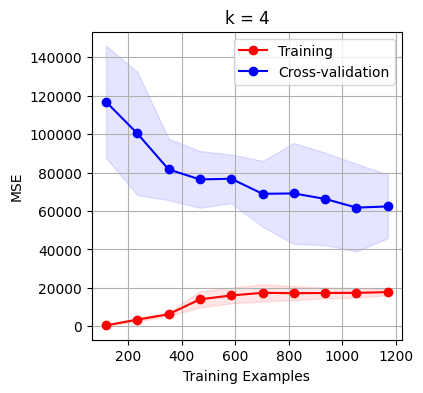

 - - - - - - - - - - - - K =  5  - - - - - - - - - - - -
RMSE Cross-Validation with k= 5 : 239.81306927296754


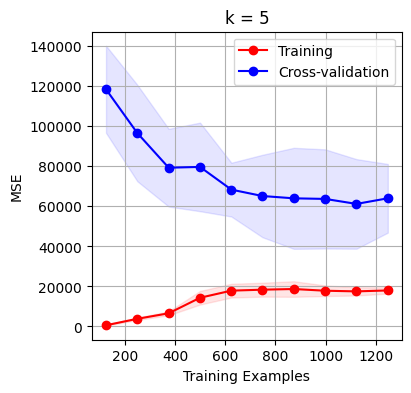

 - - - - - - - - - - - - K =  6  - - - - - - - - - - - -
RMSE Cross-Validation with k= 6 : 231.2605513467581


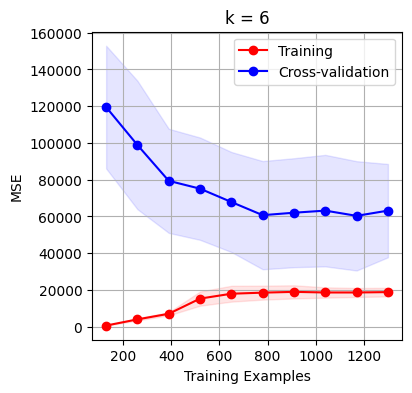

 - - - - - - - - - - - - K =  7  - - - - - - - - - - - -
RMSE Cross-Validation with k= 7 : 234.23987037029605


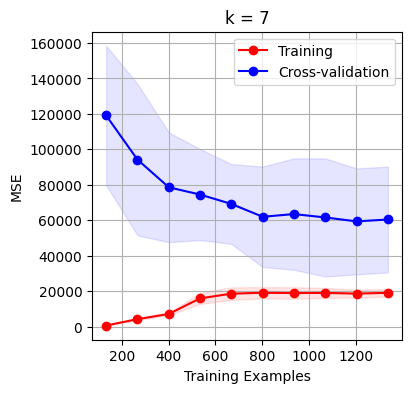

 - - - - - - - - - - - - K =  8  - - - - - - - - - - - -
RMSE Cross-Validation with k= 8 : 232.2558092171764


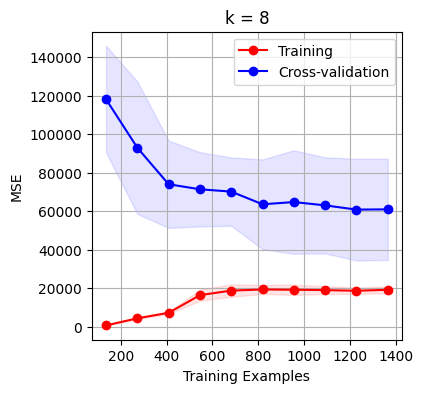

 - - - - - - - - - - - - K =  9  - - - - - - - - - - - -
RMSE Cross-Validation with k= 9 : 230.0844375709325


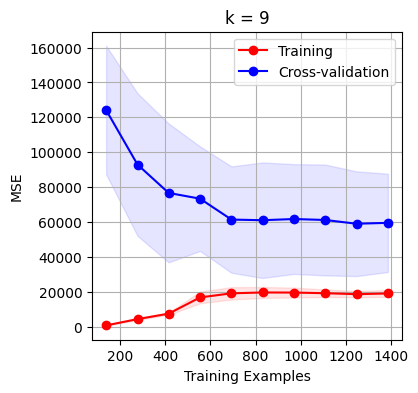

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

for k in range(2,10):
  rmse_cross_val = rmse_cv(xgb, k)
  print(" -"*12,"K = ",k," -"*12)
  print("RMSE Cross-Validation with k=",k,":", rmse_cross_val)
  draw_learning_curve(xgb, k)

MAE: 194.30391112847227
MSE: 163399.23898063807
RMSE: 404.2267173018603
R2 Score: 0.12913431339106107
 - - - - - - - - - - - - K =  2  - - - - - - - - - - - -
RMSE Cross-Validation with 2 : 341.484644316106


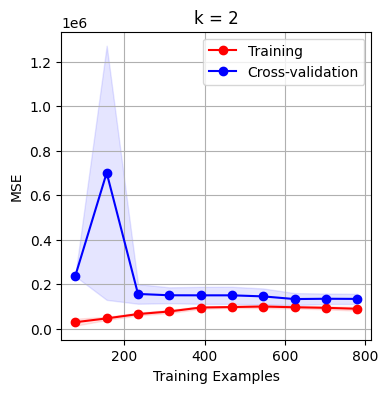

 - - - - - - - - - - - - K =  3  - - - - - - - - - - - -
RMSE Cross-Validation with 3 : 338.8921940352104


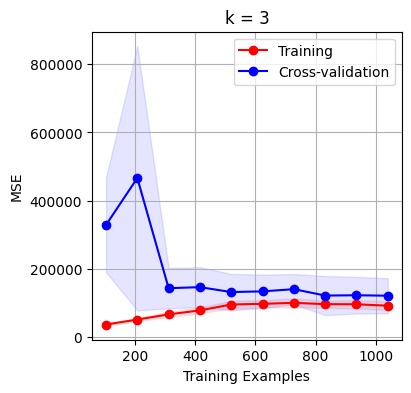

 - - - - - - - - - - - - K =  4  - - - - - - - - - - - -
RMSE Cross-Validation with 4 : 336.86890678939994


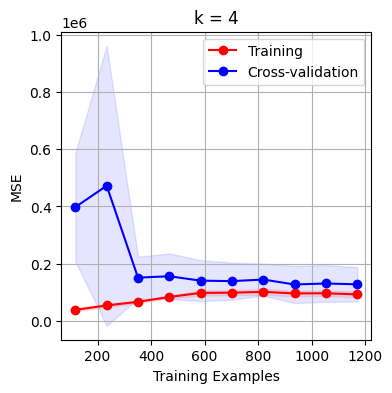

 - - - - - - - - - - - - K =  5  - - - - - - - - - - - -
RMSE Cross-Validation with 5 : 336.43164793921346


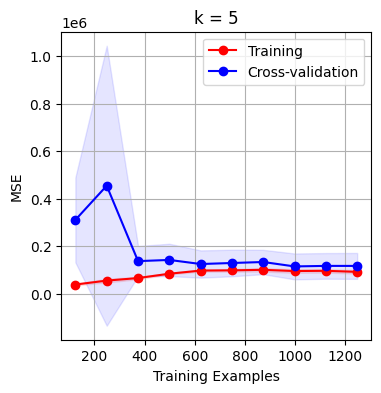

 - - - - - - - - - - - - K =  6  - - - - - - - - - - - -
RMSE Cross-Validation with 6 : 333.50988234220233


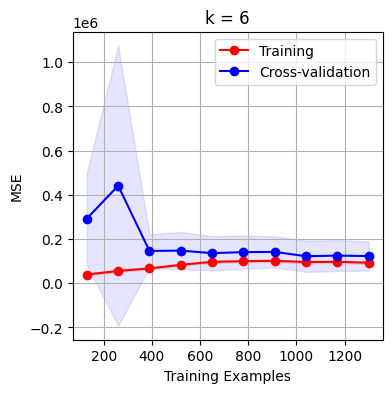

 - - - - - - - - - - - - K =  7  - - - - - - - - - - - -
RMSE Cross-Validation with 7 : 335.87290819457496


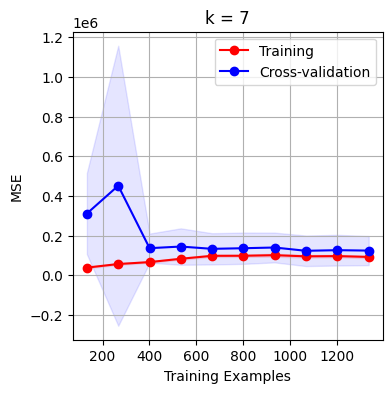

 - - - - - - - - - - - - K =  8  - - - - - - - - - - - -
RMSE Cross-Validation with 8 : 329.3432199285896


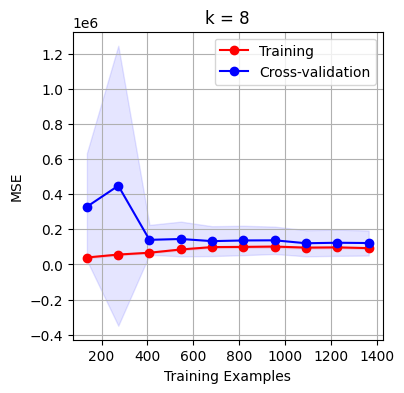

 - - - - - - - - - - - - K =  9  - - - - - - - - - - - -
RMSE Cross-Validation with 9 : 329.49544667985964


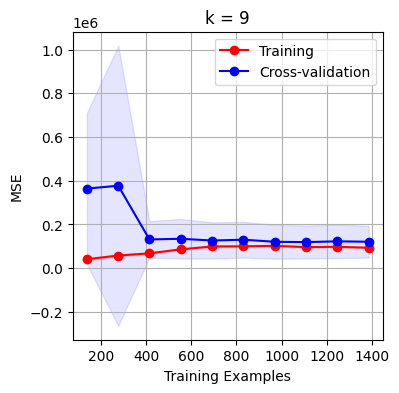

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

for k in range(2,10):
  rmse_cross_val = rmse_cv(lasso, k)
  print(" -"*12,"K = ",k," -"*12)
  print("RMSE Cross-Validation with",k,":", rmse_cross_val)
  draw_learning_curve(lasso, k)


MAE: 176.07555984226389
MSE: 95245.2345667782
RMSE: 308.6182667419059
R2 Score: 0.49237336039823676
 - - - - - - - - - - - - K =  2  - - - - - - - - - - - -
RMSE Cross-Validation with 2 : 251.11021863225056


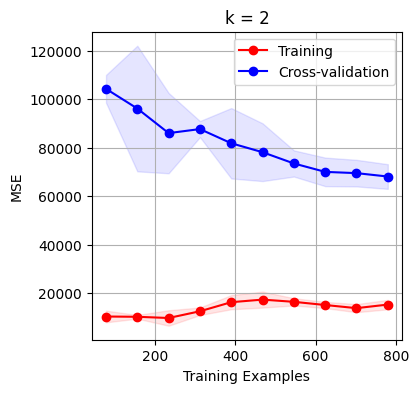

 - - - - - - - - - - - - K =  3  - - - - - - - - - - - -
RMSE Cross-Validation with 3 : 233.9670047783096


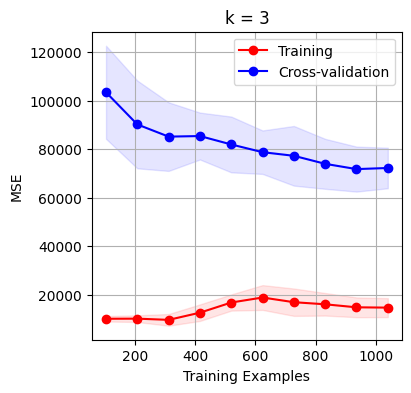

 - - - - - - - - - - - - K =  4  - - - - - - - - - - - -
RMSE Cross-Validation with 4 : 235.03179364651623


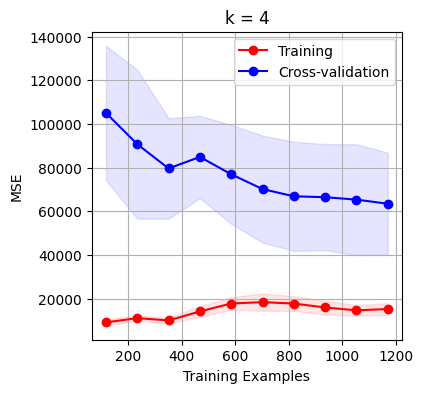

 - - - - - - - - - - - - K =  5  - - - - - - - - - - - -
RMSE Cross-Validation with 5 : 238.42612831008583


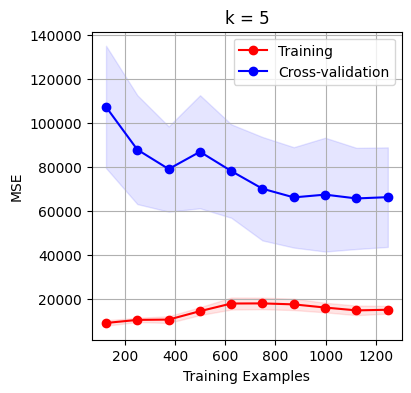

 - - - - - - - - - - - - K =  6  - - - - - - - - - - - -
RMSE Cross-Validation with 6 : 230.7175417000033


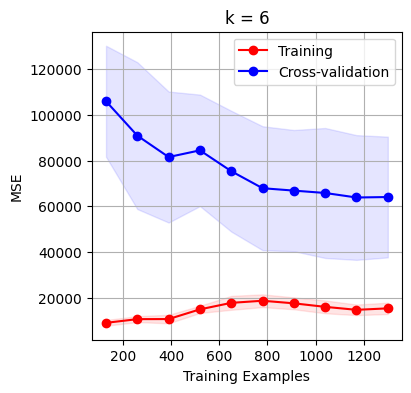

 - - - - - - - - - - - - K =  7  - - - - - - - - - - - -
RMSE Cross-Validation with 7 : 239.54725163751772


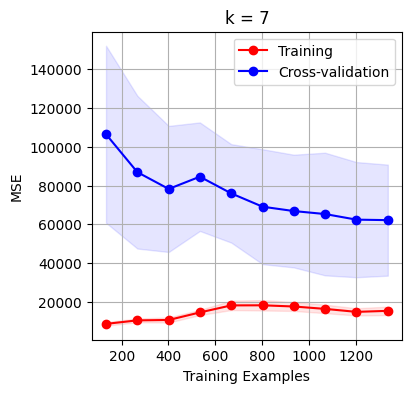

 - - - - - - - - - - - - K =  8  - - - - - - - - - - - -
RMSE Cross-Validation with 8 : 231.37405838943255


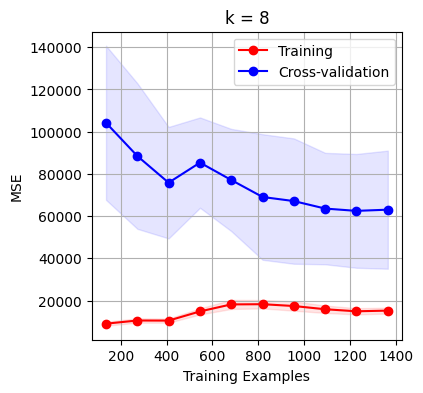

 - - - - - - - - - - - - K =  9  - - - - - - - - - - - -
RMSE Cross-Validation with 9 : 231.4678738932522


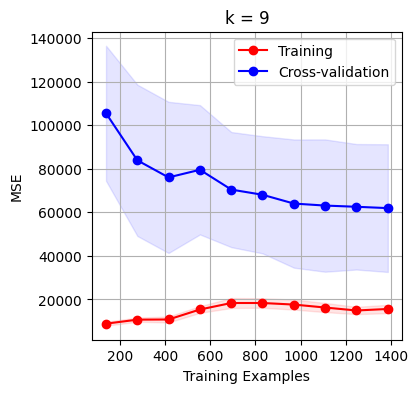

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

for k in range(2,10):
  rmse_cross_val = rmse_cv(random_forest, k)
  print(" -"*12,"K = ",k," -"*12)
  print("RMSE Cross-Validation with",k,":", rmse_cross_val)
  draw_learning_curve(random_forest, k)


##EXTRA POINT

in this section user gives us some information about what he wants and we first predict the price and then give him the top 5 choices.  

In [ ]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

def turn_into_input(cpu,ram,ssd,graphic_ram, screen_size, stock_status, hdd, company, X_train):
  final_data= np.asarray(X_train)[9]
  for i in range(28):
    final_data[i] = 0
  final_data[0] = ram
  final_data[1] = ssd
  final_data[2] = graphic_ram
  final_data[4] = hdd
  final_data[3] = screen_size
  CPU_INDEX = column_index((X_train),[cpu])
  final_data[CPU_INDEX] = 1
  SS_INDEX = column_index((X_train),[stock_status])
  final_data[SS_INDEX] = 1
  COMPANY_INDEX = column_index((X_train),[company])
  final_data[COMPANY_INDEX] = 1
  return [final_data]


#INPUT VALUES
cpu = 'Core i5'
ram = 8.00e+03
ssd = 5.12e+02
graphic_ram=4.00e+03
screen_size= 1.56e+01
stock_status= 'new'
hdd= 0.00e+00
company= 'asus'

#GET PREDICTION
my_laptop =turn_into_input(cpu,ram,ssd,graphic_ram, screen_size, stock_status, hdd, company, X_train)

my_laptop_price = regressor.predict(my_laptop)
print("a laptop with your desired is around "+str(my_laptop_price[0] * 100000)+"toman")

a laptop with your desired is around 35094909.91962197toman


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##FIND THE MOST SUTIABLE FOR ME

---






In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def find_my_best_match(point, features):
  targets =[]
  i = 0;
  for x in np.asarray(features):
     num = cosine_similarity(np.asarray(point), [np.asarray(x)])
     targets.append((i, abs(num)))
     i = i + 1
  return sorted(targets, key=lambda x: x[1][0][0], reverse = True)
best = (find_my_best_match(my_laptop, features))
for i in range (5):
  print("---------------------------***" + str(i+1)+"***------------------------------")
  print(original_frame.iloc[best[i][0]][0:9])
  print("BUY FROM TRORB AT:" + original_frame.iloc[best[i][0]]["links"] )

---------------------------***1***------------------------------
price           33890000
cpu              Core i5
ram               8000.0
ssd                  512
graphic_ram         4000
screen_size         15.6
stock_status         new
hdd                    0
company             asus
Name: 88, dtype: object
BUY FROM TRORB AT:https://torob.com/p/81f7963f-d7a4-4385-a68c-a6a741fff24b/asus-tuf-gaming-fx506hf-core-i5-11400-8gb-512ssd-4gb-2050/
---------------------------***2***------------------------------
price           32179000
cpu              Core i5
ram               8000.0
ssd                  512
graphic_ram         4000
screen_size         15.6
stock_status         new
hdd                    0
company             asus
Name: 143, dtype: object
BUY FROM TRORB AT:https://torob.com/p/be663199-b7c5-4f2e-b93c-a5913e6298e5/%D9%84%D9%BE-%D8%AA%D8%A7%D9%BE-%D8%A7%DB%8C%D8%B3%D9%88%D8%B3-vivobook-s-15-oled-k3502za-z/
---------------------------***3***------------------------------
pric